In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import pandas as pd
import numpy as np
from config import openweather_api_key
from datetime import datetime
import time
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + openweather_api_key + "&units=imperial"

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=80)
lngs = np.random.uniform(low=-180.000, high=180.000, size=80)
coordinates = zip(lats, lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.  If greater than
# 60, reduce to 60 to avoid violating the API subscription
if len(cities) > 60:
    cities = cities[:60]
len(cities)

60

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error occurs, skip the city.
    except:
        print(city + " not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | tahoua
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | formoso do araguaia
formoso do araguaia not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | palabuhanratu
palabuhanratu not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | mys shmidta
mys shmidta not found. Skipping...
Processing Record 17 of Set 1 | rio grande
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | saint-phi

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 
                          'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[city_data_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-09-26 19:43:19,-0.6000,73.0833,82.81,72,100,17.13
1,Tuktoyaktuk,CA,2021-09-26 19:43:19,69.4541,-133.0374,33.80,93,90,16.11
2,Atuona,PF,2021-09-26 19:43:19,-9.8000,-139.0333,78.22,70,5,18.21
3,Tahoua,NE,2021-09-26 19:43:20,14.8888,5.2692,92.97,16,5,7.02
4,Chuy,UY,2021-09-26 19:43:20,-33.6971,-53.4616,65.66,74,1,6.60
5,Cape Town,ZA,2021-09-26 19:42:56,-33.9258,18.4232,62.10,76,0,1.99
6,Severo-Kurilsk,RU,2021-09-26 19:43:20,50.6789,156.1250,48.99,91,97,11.18
7,Bredasdorp,ZA,2021-09-26 19:43:21,-34.5322,20.0403,59.29,88,1,4.61
8,Mataura,NZ,2021-09-26 19:43:21,-46.1927,168.8643,39.47,87,5,2.01
9,Kodiak,US,2021-09-26 19:43:22,57.7900,-152.4072,47.71,61,1,11.50


In [5]:
# Save the city data to a CSV (6.2.7)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [6]:
# 6.3.1 Scatter plots for weather data based on Latitude
# Extract the weather related data to Series objects
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

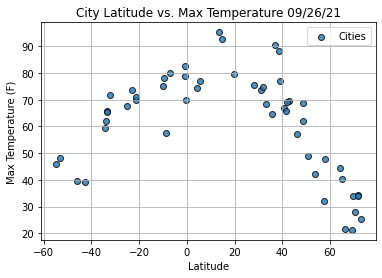

In [7]:
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1,
            marker = 'o', alpha = 0.8, label = "Cities")
today = time.strftime("%x")
#plt.title("City Latitude vs. Max Temperature " + datetime.now().strftime("%x"))
plt.title("City Latitude vs. Max Temperature " + today)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()
plt.grid(True)
#Save the plot to a file
plt.savefig("weather_data/Fig1.png")
plt.show()

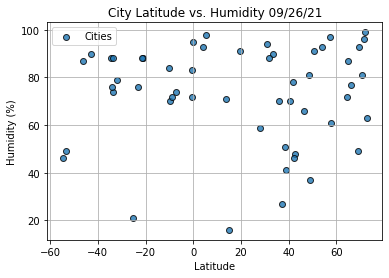

In [8]:
plt.scatter(lats, humidity, edgecolor='black', linewidths=1,
            marker = 'o', alpha = 0.8, label = "Cities")
today = time.strftime("%x")
plt.title("City Latitude vs. Humidity " + today)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
#Save the plot to a file
plt.savefig("weather_data/Fig2.png")
plt.show()

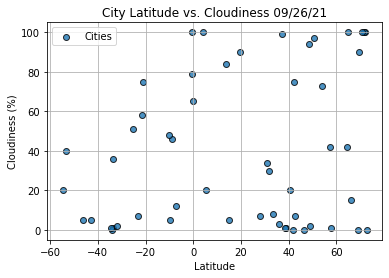

In [9]:
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1,
            marker = 'o', alpha = 0.8, label = "Cities")
today = time.strftime("%x")
plt.title("City Latitude vs. Cloudiness " + today)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)
#Save the plot to a file
plt.savefig("weather_data/Fig3.png")
plt.show()

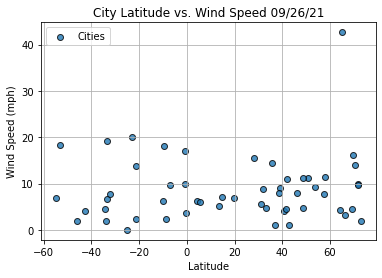

In [10]:
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1,
            marker = 'o', alpha = 0.8, label = "Cities")
today = time.strftime("%x")
plt.title("City Latitude vs. Wind Speed " + today)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.grid(True)
#Save the plot to a file
plt.savefig("weather_data/Fig4.png")
plt.show()

In [27]:
# 6.4.2: Linear Regression

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\nr-value: " + str(round(r_value, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.  "text_coordinates" defines
    # where the line_eq text is placed on the graph
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

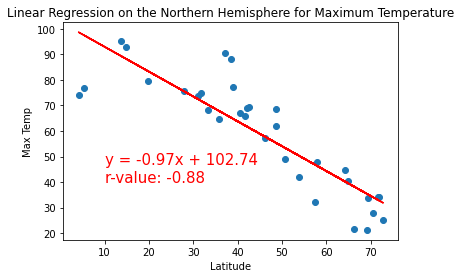

In [29]:
# Linear regression for the Northern Hemisphere temperatures
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Plot
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp', (10,40))

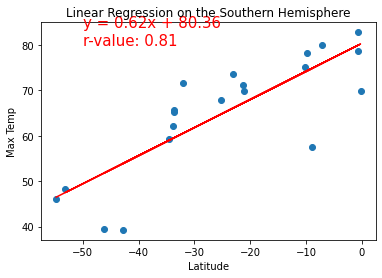

In [38]:
# Linear regression for the Northern Hemisphere temperatures
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Plot
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere',
                       'Max Temp', (-50,80))

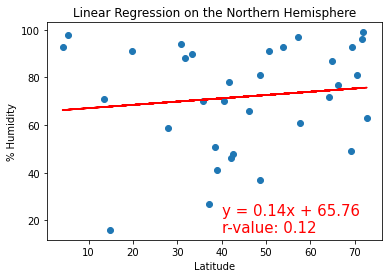

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere', 
                       '% Humidity',(40,15))

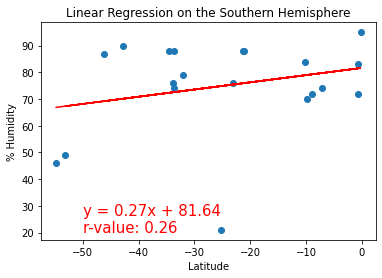

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere', '% Humidity',(-50,20))

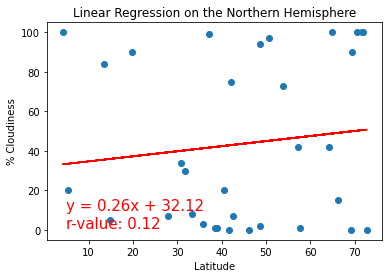

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere', '% Cloudiness',(5,1))

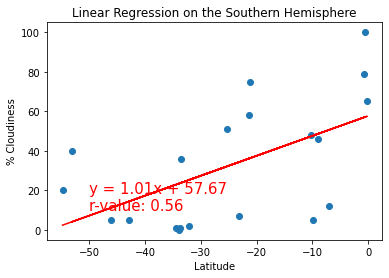

In [47]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere', '% Cloudiness',(-50,10))